In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
#opening given dat file on VS code, inspected that it is a csv file (whitespace separated), col names not present so no headers given
#print(os.getcwd())


In [7]:
vertebral_col_df1 = pd.read_csv('Homework 1 Data/vertebral_column_data/column_2C.dat', delim_whitespace=True, header=None)
print(vertebral_col_df1)

         0      1      2      3       4      5   6
0    63.03  22.55  39.61  40.48   98.67  -0.25  AB
1    39.06  10.06  25.02  29.00  114.41   4.56  AB
2    68.83  22.22  50.09  46.61  105.99  -3.53  AB
3    69.30  24.65  44.31  44.64  101.87  11.21  AB
4    49.71   9.65  28.32  40.06  108.17   7.92  AB
..     ...    ...    ...    ...     ...    ...  ..
305  47.90  13.62  36.00  34.29  117.45  -4.25  NO
306  53.94  20.72  29.22  33.22  114.37  -0.42  NO
307  61.45  22.69  46.17  38.75  125.67  -2.71  NO
308  45.25   8.69  41.58  36.56  118.55   0.21  NO
309  33.84   5.07  36.64  28.77  123.95  -0.20  NO

[310 rows x 7 columns]


In [8]:
vertebral_col_df1.columns=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'class']
#print(vertebral_col_df1)
vertebral_col_df1['class'] = vertebral_col_df1['class'].replace({'NO': 0, 'AB': 1}) #panda documentation
print(vertebral_col_df1)

     pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0               63.03        22.55                  39.61         40.48   
1               39.06        10.06                  25.02         29.00   
2               68.83        22.22                  50.09         46.61   
3               69.30        24.65                  44.31         44.64   
4               49.71         9.65                  28.32         40.06   
..                ...          ...                    ...           ...   
305             47.90        13.62                  36.00         34.29   
306             53.94        20.72                  29.22         33.22   
307             61.45        22.69                  46.17         38.75   
308             45.25         8.69                  41.58         36.56   
309             33.84         5.07                  36.64         28.77   

     pelvic radius  grade of spondylolisthesis  class  
0            98.67                       -0

In [9]:
vertebral_col_df2 = pd.read_csv('Homework 1 Data/vertebral_column_data/column_3C.dat', delim_whitespace=True, header=None)
#print(vertebral_col_df2)
vertebral_col_df2.columns=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'class']
vertebral_col_df2['class'] = vertebral_col_df1['class'].replace({'NO': 0, 'AB': 1}) #panda documentation
#print(vertebral_col_df2)
normal_data_1 = vertebral_col_df1[vertebral_col_df1['class']==0]
normal_Data_2 = vertebral_col_df2[vertebral_col_df2['class']==0]
if(normal_data_1.equals(normal_Data_2)):
    print("equal, so column_3C.dat file can be ignored")

equal, so column_3C.dat file can be ignored


In [10]:
import seaborn as sns

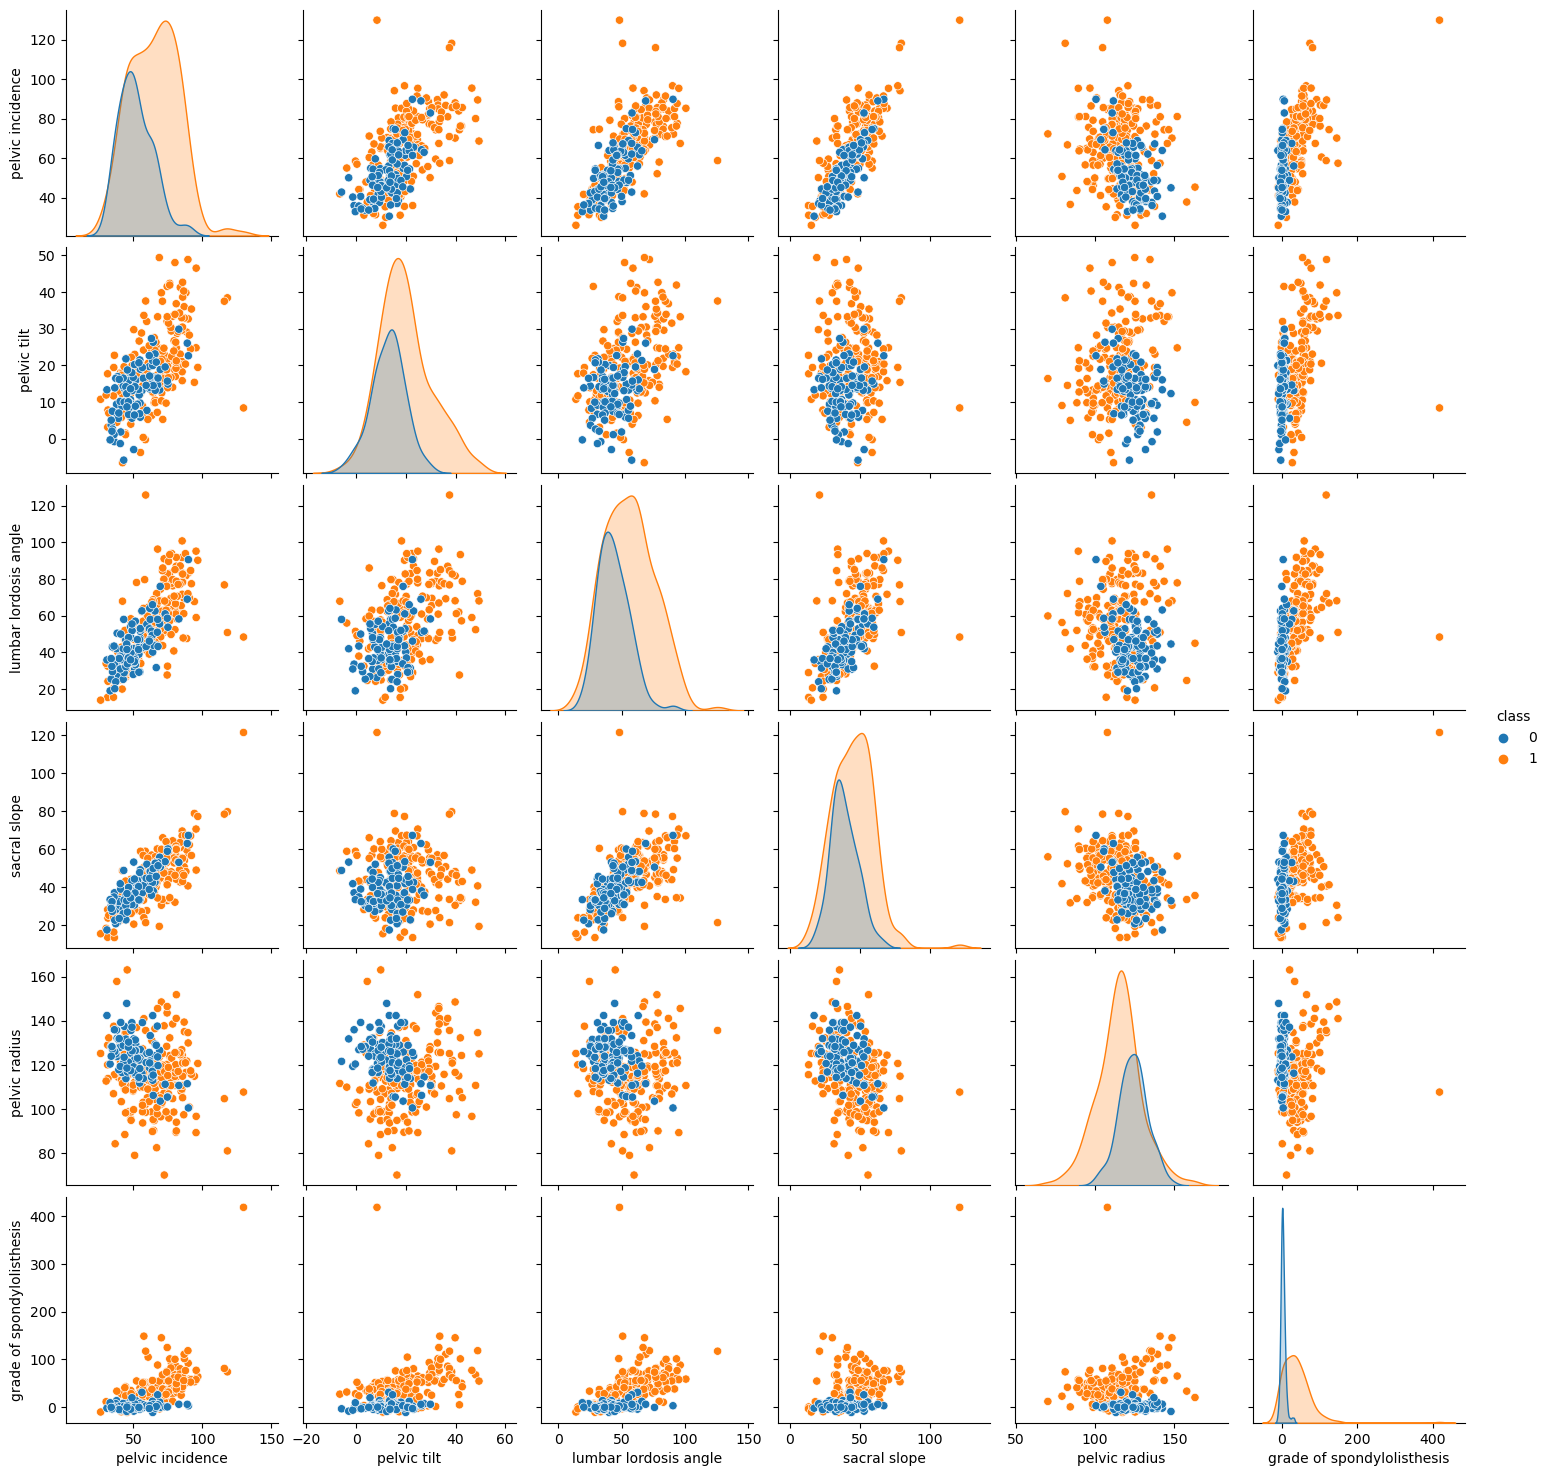

In [11]:
sns.pairplot(data = vertebral_col_df1, vars=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis'], hue='class')

b. ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).

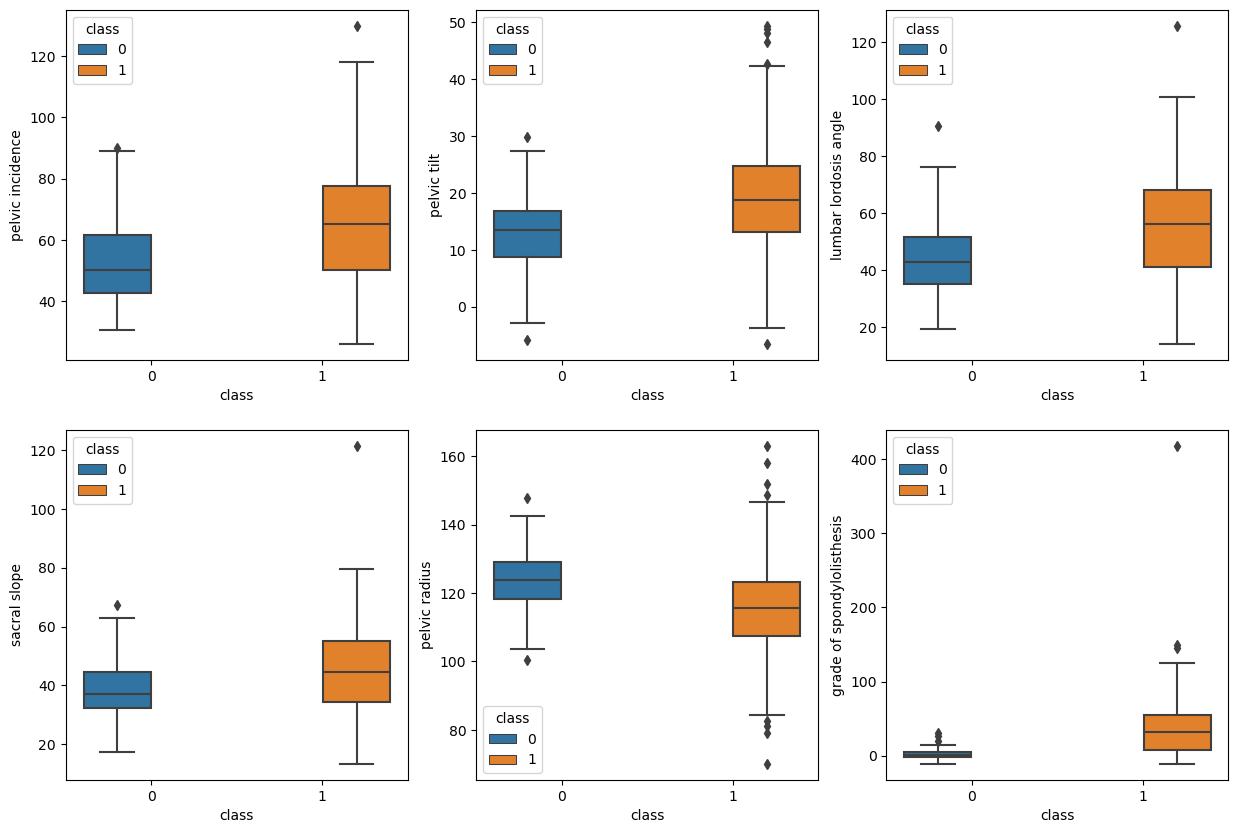

In [12]:
#reffering to homework0 assignment of plotting multiple graphs using for loop
import matplotlib.pyplot as plt
var_data=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis']
plt.figure(figsize=(15,10))
for x in range(len(var_data)):
    plt.subplot(2, 3, x+1) 
    sns.boxplot(x=vertebral_col_df1['class'], y=var_data[x], data=vertebral_col_df1, hue='class')##referred to documentation
    #print(var_data[x])c
    

iii. Select the First 70 rows of Class 0 and the First 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [13]:
training_set1 = normal_data_1.head(70)
abnormal_data_1 = vertebral_col_df1[vertebral_col_df1['class']==1]
training_set2 = abnormal_data_1.head(140)
print(len(training_set1))
print(len(training_set2))

training_set = pd.concat([training_set1, training_set2], axis=0)
print(training_set.index)
print(len(training_set[training_set['class']==0]))

#test set - remaining rows from original df and reset index
test_set = vertebral_col_df1.drop(training_set.index)
#print("before resetting index", test_set.head(5))
test_set =test_set.reset_index(drop=True)
#print("after resetting index", test_set.head(5))
print("total data set legth", len(vertebral_col_df1))
print("length of training set:", len(training_set), "length of test data:", len(test_set))


70
140
Index([210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       ...
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
      dtype='int64', length=210)
70
total data set legth 310
length of training set: 210 length of test data: 100


In [14]:
#verifying
print(len(training_set[training_set['class']==1])) 
print(len(test_set[test_set['class']==0]))# 100 - 70 = 30 test class 0
print(len(test_set[test_set['class']==1]))# 210 -140 = 70 test class 1
print(len(vertebral_col_df1[vertebral_col_df1['class']==0]))#100 class 0
print(len(vertebral_col_df1[vertebral_col_df1['class']==1]))#210 class 1

140
30
70
100
210


(c) Classification using KNN on Vertebral Column Data Set (20 pts)
i. Write code for k-nearest neighbors with Euclidean metric (or use a software
package).

In [15]:
from sklearn.neighbors import KNeighborsClassifier 

ii. Test all the data in the test database with k nearest neighbors. Take de-
cisions by majority polling. Plot train and test errors in terms of k for
k -> {208; 205; : : : ; 7; 4; 1;} (in reverse order). You are welcome to use smaller
increments of k. Which k* is the most suitable k among those values? Cal-
culate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k = k*2

In [16]:
#filter x_test , y_test, x_train, y_train

x_test = test_set.iloc[:, :-1].to_numpy()# Select all columns except the last one as feature.
y_test = test_set.iloc[:, -1].to_numpy() # get last column
x_train = training_set.iloc[:, :-1].to_numpy()
y_train = training_set.iloc[:, -1].to_numpy()


In [17]:
print(type(y_test))
print(type(x_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


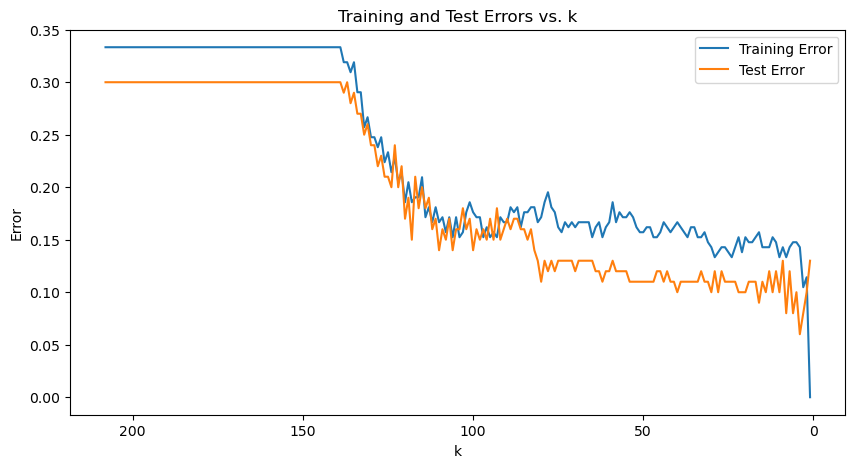

The best k for test set is: 4 with test error rate:0.06000000000000005
The best k for training set is: 1 with train error rate:0.0


In [63]:
k_list = list(range(208, 0, -1))
training_errors = []
test_errors = []
for k in k_list:
    neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    neigh.fit(x_train, y_train)

    #predict train data
    y_pred_train = neigh.predict(x_train)
    
    training_error=1-neigh.score(x_train, y_train)
    training_errors.append(training_error)
    
    # Predict on test data
    y_pred_test = neigh.predict(x_test)
    test_error = 1 - neigh.score(x_test, y_test)
    test_errors.append(test_error)

best_test_error_rate = min(test_errors)
best_train_error_rate = min(training_errors)
# Plot train and test errors
plt.figure(figsize=(10, 5))
plt.plot(k_list, training_errors, label='Training Error')
plt.plot(k_list, test_errors, label='Test Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Training and Test Errors vs. k')
plt.legend()
plt.gca().invert_xaxis()  # To plot in largest to smallest k as mentioned
plt.show()

best_k = k_list[np.argmin(test_errors)]
best_k_train = k_list[np.argmin(training_errors)]
print(f"The best k for test set is: {best_k} with test error rate:{best_test_error_rate}")
print(f"The best k for training set is: {best_k_train} with train error rate:{best_train_error_rate}")

Calculate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k = k* = 4.

calculating, true positive rate by treating normal classes 0 as positive and abnormal 1 as negative.

Confusion Matrix for k=4:
[[25  5]
 [ 1 69]]
True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1-Score: 0.9583333333333333


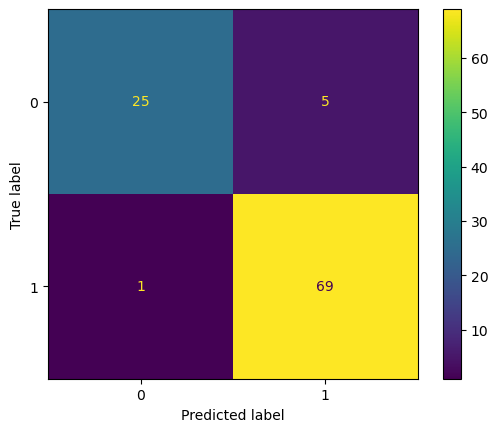

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, precision_score, ConfusionMatrixDisplay
neigh_optimal = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
neigh_optimal.fit(x_train, y_train)
y_pred_test_optimal = neigh_optimal.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred_test_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=neigh_optimal.classes_)
disp.plot()

true_positive_rate = recall_score(y_test, y_pred_test_optimal, pos_label=1)
true_negative_rate = recall_score(y_test,y_pred_test_optimal, pos_label=0)
precision = precision_score(y_test, y_pred_test_optimal, pos_label=1)
f1 = f1_score(y_test, y_pred_test_optimal, pos_label=1)

print(f"Confusion Matrix for k=4:\n{conf_matrix}")
print(f"True Positive Rate: {true_positive_rate}")
print(f"True Negative Rate: {true_negative_rate}")
print(f"Precision: {precision}")
print(f"F1-Score: {f1}")



iii. Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the best test error rate,3 which
is obtained by some value of k, against the size of training set, when the
size of training set is N 2 f10; 20; 30; : : : ; 210g.4 Note: for each N, select
your training set by choosing the First N/3 rows of Class 0 and the First
N 1-N/3 rows of Class 1 in the training set you created in 7(b)iii. Also, for
each N, select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1; 6; 11; : : : ; 196}.
This plot is called a Learning Curve.

Training set size: 10, Best k: 1, Best test error: 0.25
Training set size: 20, Best k: 6, Best test error: 0.19999999999999996
Training set size: 30, Best k: 1, Best test error: 0.21999999999999997
Training set size: 40, Best k: 11, Best test error: 0.25
Training set size: 50, Best k: 26, Best test error: 0.30000000000000004
Training set size: 60, Best k: 21, Best test error: 0.29000000000000004
Training set size: 70, Best k: 26, Best test error: 0.29000000000000004
Training set size: 80, Best k: 31, Best test error: 0.29000000000000004
Training set size: 90, Best k: 41, Best test error: 0.29000000000000004
Training set size: 100, Best k: 6, Best test error: 0.25
Training set size: 110, Best k: 6, Best test error: 0.21999999999999997
Training set size: 120, Best k: 16, Best test error: 0.17000000000000004
Training set size: 130, Best k: 16, Best test error: 0.16000000000000003
Training set size: 140, Best k: 16, Best test error: 0.15000000000000002
Training set size: 150, Best k: 16, B

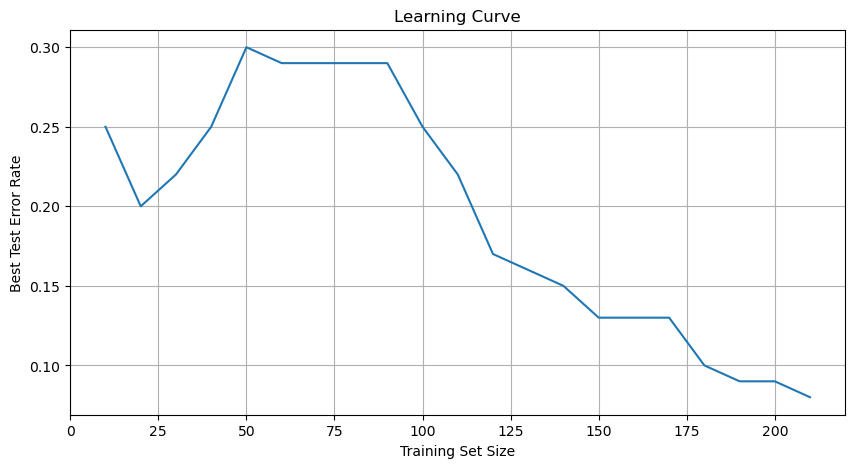

In [62]:
training_set_sizes = list(range(10, 211, 10))
best_test_errors_rate = []
best_k_values = []

for N in training_set_sizes:
    class_0 = N // 3
    class_1 = N - class_0
    training_set2 = pd.concat([normal_data_1.head(class_0), abnormal_data_1.head(class_1)], axis=0)
    
    test_set2 = vertebral_col_df1.drop(training_set.index).reset_index(drop=True)
    
    x_train2 = training_set2.iloc[:, :-1].to_numpy()
    y_train2 = training_set2.iloc[:, -1].to_numpy()
    x_test2 = test_set2.iloc[:, :-1].to_numpy()
    y_test2 = test_set2.iloc[:, -1].to_numpy()

    k_list = [k for k in range(1, min(len(x_train2), 197), 5)]
    
    test_errors_rate = []
    optimal_k = k_list[0]
    best_test_error = 1

    for k in k_list:
        neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        neigh.fit(x_train2, y_train2)
        # Calculate test error
        test_error = 1 - neigh.score(x_test2, y_test2)
        test_errors_rate.append(test_error)

        if test_error < best_test_error:
            best_test_error = test_error
            optimal_k = k
            
        
    best_test_errors_rate.append(best_test_error)
    best_k_values.append(optimal_k)
    print(f"Training set size: {N}, Best k: {optimal_k}, Best test error: {best_test_error}")

# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(training_set_sizes, best_test_errors_rate)
plt.xlabel('Training Set Size')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

Let us further explore some variants of KNN.
(d) Replace the Euclidean metric with the following metrics5 and test them. Sum-
marize the test errors (i.e., when k = k*) in a table. Use all of your training data
and select the best k when {1; 6; 11; : : : ; 196}. (10 pts)

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

B. with log10(p) 2 {0.1; 0.2; 0.3; . . . . 1}. In this case, use the k* you found
for the Manhattan distance in 7(d)iA. What is the best log10(p)?

C. which becomes Chebyshev Distance with p→∞

Manhattan Distance where p=1 in Minkowski

In [21]:

k_list = [k for k in range(1, 197, 5)]
test_errors= []
optimal_k = k_list[0]
best_test_error = 1
#train and get test errors
for k in k_list:
    manhattan_neigh = KNeighborsClassifier(n_neighbors=k, p=1)
    manhattan_neigh.fit(x_train, y_train)
    test_error =(1-manhattan_neigh.score(x_test, y_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        best_test_error = test_error
        optimal_k = k
        print(f"for k: {k},  test error: {best_test_error}")
    elif test_error == best_test_error:
        print(f"for k: {k},  test error: {best_test_error}")

print(f"choosing Best k: {optimal_k}, Best test error: {best_test_error}")
test_error_summary = pd.DataFrame(columns=['k', 'Test Error', 'Metric'])
summary = pd.DataFrame({'k': [optimal_k], 'Test Error': [best_test_error], 'Metric': ['Manhattan']})
test_error_summary = pd.concat([test_error_summary, summary], ignore_index=True)
display(test_error_summary)

for k: 1,  test error: 0.12
for k: 6,  test error: 0.10999999999999999
for k: 11,  test error: 0.10999999999999999
for k: 26,  test error: 0.10999999999999999
choosing Best k: 6, Best test error: 0.10999999999999999


,k,Test Error,Metric
0,6,0.11,Manhattan


with log10(p) 2 {0.1; 0.2; 0.3; . . . . 1}. In this case, use the k* you found
for the Manhattan distance in 7(d)iA. What is the best log10(p)?

In [71]:
import math
p_value = [10**i for i in np.arange(0.1, 1.1, 0.1)]
test_errors= []
optimal_p = p_value[0]
best_test_error = 1
#train and get test errors
for k in p_value:
    log_neigh = KNeighborsClassifier(n_neighbors=6, p=k)
    log_neigh.fit(x_train, y_train)
    test_error =(1-log_neigh.score(x_test, y_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        best_test_error = test_error
        optimal_p = k
        print(f"for p: {k},  test error: {best_test_error}")
    elif test_error == best_test_error:
        print(f"for p: {k},  test error: {best_test_error}")

print(f"choosing Best p as {(optimal_p)}, we get log10 as: {math.log10(optimal_p)}, with best test error: {best_test_error}")
summary = pd.DataFrame({'k': [optimal_k], 'Test Error': [best_test_error], 'Metric': ['log']})
test_error_summary = pd.concat([test_error_summary, summary], ignore_index=True)
test_error_summary= test_error_summary.drop_duplicates()
display(test_error_summary)

for p: 1.2589254117941673,  test error: 0.08999999999999997
for p: 1.5848931924611136,  test error: 0.08999999999999997
for p: 1.9952623149688797,  test error: 0.07999999999999996
for p: 2.51188643150958,  test error: 0.07999999999999996
for p: 3.1622776601683795,  test error: 0.07999999999999996
for p: 3.9810717055349722,  test error: 0.06000000000000005
choosing Best p as 3.9810717055349722, we get log10 as: 0.6, with best test error: 0.06000000000000005


,k,Test Error,Metric
0,6,0.11,Manhattan
1,6,0.06,log


C. which becomes Chebyshev Distance with p→∞

In [23]:
k_list = [k for k in range(1, 197, 5)]
test_errors= []
optimal_k = k_list[0]
best_test_error = 1
#train and get test errors
for k in k_list:
    chebyshev = KNeighborsClassifier(n_neighbors=k, p=math.inf)
    chebyshev.fit(x_train, y_train)
    test_error =(1-chebyshev.score(x_test, y_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        best_test_error = test_error
        optimal_k = k
        print(f"for k: {k},  test error: {best_test_error}")#checking for repeated values
    elif test_error == best_test_error:
        print(f"for k: {k},  test error: {best_test_error}")

print(f"choosing Best k: {optimal_k}, Best test error: {best_test_error}")
summary = pd.DataFrame({'k': [optimal_k], 'Test Error': [best_test_error], 'Metric': ['chebyshev']})
test_error_summary = pd.concat([test_error_summary, summary], ignore_index=True)
display(test_error_summary)

for k: 1,  test error: 0.13
for k: 6,  test error: 0.09999999999999998
for k: 16,  test error: 0.07999999999999996
choosing Best k: 16, Best test error: 0.07999999999999996


,k,Test Error,Metric
0,6,0.11,Manhattan
1,6,0.06,log
2,16,0.08,chebyshev


ii. Mahalanobis Distance

In [24]:
k_list = [k for k in range(1, 197, 5)]
test_errors= []
optimal_k = k_list[0]
best_test_error = 1
#train and get test errors
VI = np.linalg.pinv(np.cov(x_train.T))
for k in k_list:
    mahalanobis_neigh = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': VI}) #refered to stackoverflow
    mahalanobis_neigh.fit(x_train, y_train)
    test_error =(1-mahalanobis_neigh.score(x_test, y_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        best_test_error = test_error
        optimal_k = k
        print(f"for k: {k},  test error: {best_test_error}")#checking for repeated values
    elif test_error == best_test_error:
        print(f"for k: {k},  test error: {best_test_error}")

print(f"choosing Best k: {optimal_k}, Best test error: {best_test_error}")
summary = pd.DataFrame({'k': [optimal_k], 'Test Error': [best_test_error], 'Metric': ['mahalanobis']})
test_error_summary = pd.concat([test_error_summary, summary], ignore_index=True)
test_error_summary= test_error_summary.drop_duplicates()

display(test_error_summary)

for k: 1,  test error: 0.17000000000000004
for k: 6,  test error: 0.17000000000000004
choosing Best k: 1, Best test error: 0.17000000000000004


,k,Test Error,Metric
0,6,0.11,Manhattan
1,6,0.06,log
2,16,0.08,chebyshev
3,1,0.17,mahalanobis


(e) The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is inversely proportional to its distance from the
query/test data point. In this case, closer neighbors of a query point will have
a greater in
uence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k 2 {1; 6; 11; 16; : : : ; 196}. (10 pts)

Euclidean

In [25]:
k_list = [k for k in range(1, 197, 5)]
test_errors= []
optimal_k = k_list[0]
best_test_error = 1
#train and get test errors
for k in k_list:
    euclidean = KNeighborsClassifier(n_neighbors=k, weights='distance')
    euclidean.fit(x_train, y_train)
    test_error =(1-euclidean.score(x_test, y_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        best_test_error = test_error
        optimal_k = k
        print(f"for k: {k},  test error: {best_test_error}")#checking for repeated values
    elif test_error == best_test_error:
        print(f"for k: {k},  test error: {best_test_error}")

print(f"choosing Best k: {optimal_k}, Best test error: {best_test_error}")
summary = pd.DataFrame({'k': [optimal_k], 'Test Error': [best_test_error], 'Metric': ['weighted euclidean']})
test_error_summary = pd.concat([test_error_summary, summary], ignore_index=True)
test_error_summary.drop_duplicates()
display(test_error_summary)

for k: 1,  test error: 0.13
for k: 6,  test error: 0.09999999999999998
choosing Best k: 6, Best test error: 0.09999999999999998


,k,Test Error,Metric
0,6,0.11,Manhattan
1,6,0.06,log
2,16,0.08,chebyshev
3,1,0.17,mahalanobis
4,6,0.10,weighted euclidean


Manhattan

In [26]:
k_list = [k for k in range(1, 197, 5)]
test_errors= []
optimal_k = k_list[0]
best_test_error = 1
#train and get test errors
for k in k_list:
    weighted_manhattan = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    weighted_manhattan.fit(x_train, y_train)
    test_error =(1-weighted_manhattan.score(x_test, y_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        best_test_error = test_error
        optimal_k = k
        print(f"for k: {k},  test error: {best_test_error}")#checking for repeated values
    elif test_error == best_test_error:
        print(f"for k: {k},  test error: {best_test_error}")

print(f"choosing Best k: {optimal_k}, Best test error: {best_test_error}")
summary = pd.DataFrame({'k': [optimal_k], 'Test Error': [best_test_error], 'Metric': ['weighted manhattan']})
test_error_summary = pd.concat([test_error_summary, summary], ignore_index=True)
test_error_summary.drop_duplicates()
display(test_error_summary)

for k: 1,  test error: 0.12
for k: 6,  test error: 0.10999999999999999
for k: 11,  test error: 0.10999999999999999
for k: 21,  test error: 0.10999999999999999
for k: 26,  test error: 0.09999999999999998
choosing Best k: 26, Best test error: 0.09999999999999998


,k,Test Error,Metric
0,6,0.11,Manhattan
1,6,0.06,log
2,16,0.08,chebyshev
3,1,0.17,mahalanobis
4,6,0.10,weighted euclidean
5,26,0.10,weighted manhattan


Weighted Chebyshev

In [27]:
k_list = [k for k in range(1, 197, 5)]
test_errors= []
optimal_k = k_list[0]
best_test_error = 1
#train and get test errors
for k in k_list:
    weighted_chebyshev = KNeighborsClassifier(n_neighbors=k, weights='distance', p=math.inf)
    weighted_chebyshev.fit(x_train, y_train)
    test_error =(1-weighted_chebyshev.score(x_test, y_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        best_test_error = test_error
        optimal_k = k
        print(f"for k: {k},  test error: {best_test_error}")#checking for repeated values
    elif test_error == best_test_error:
        print(f"for k: {k},  test error: {best_test_error}")

print(f"choosing Best k: {optimal_k}, Best test error: {best_test_error}")
summary = pd.DataFrame({'k': [optimal_k], 'Test Error': [best_test_error], 'Metric': ['weighted chebyshev']})
test_error_summary = pd.concat([test_error_summary, summary], ignore_index=True)
#test_error_summary= test_error_summary.drop(7)
test_error_summary = test_error_summary.drop_duplicates()
display(test_error_summary)

for k: 1,  test error: 0.13
for k: 6,  test error: 0.13
for k: 11,  test error: 0.12
for k: 16,  test error: 0.10999999999999999
for k: 31,  test error: 0.10999999999999999
for k: 36,  test error: 0.10999999999999999
for k: 41,  test error: 0.10999999999999999
for k: 61,  test error: 0.10999999999999999
choosing Best k: 16, Best test error: 0.10999999999999999


,k,Test Error,Metric
0,6,0.11,Manhattan
1,6,0.06,log
2,16,0.08,chebyshev
3,1,0.17,mahalanobis
4,6,0.10,weighted euclidean
5,26,0.10,weighted manhattan
6,16,0.11,weighted chebyshev


(f) What is the lowest training error rate you achieved in this homework? (5 pts)

Answer :The lowest training error rate obtained is when k=1 and the rate = 0. This is due to the fact that as k decreases, the model gets over fitted that is the nearest neighbor to any training data point is the data point itself. So it wont make any mistakes/error in classifying.

Reference:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://github.com/scikit-learn/scikit-learn/blob/739811475/sklearn/neighbors/_classification.py#L216

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics